In [1]:
import fiona
import csv
import datetime
import time
import subprocess
import pandas as pd
import os.path
from operator import itemgetter
import glob
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df =  pd.read_csv("ais_vessel_data.csv", low_memory=False)

In [3]:
df.shape

(4028095, 19)

In [4]:
df.columns

Index(['id', 'latitude', 'longitude', 'SOG', 'COG', 'Heading', 'ROT',
       'Timestamp', 'Status', 'VoyageID', 'MMSI', 'ReceiverType', 'ReceiverID',
       'Year', 'Month', 'Day', 'Hour', 'Min', 'Second'],
      dtype='object')

In [5]:
df.head()

,id,latitude,longitude,SOG,COG,Heading,ROT,Timestamp,Status,VoyageID,MMSI,ReceiverType,ReceiverID,Year,Month,Day,Hour,Min,Second
0,1069,53.320122,-176.940237,9.700000,80.099998,92.0,0.0,1388774144,0,11,257000547,r,17MAWA1,2014,1,3,13,35,44
1,1070,53.321838,-176.925508,9.600000,77.300003,87.0,127.0,1388774343,0,11,257000547,r,17MAWA1,2014,1,3,13,39,3
2,1071,53.326722,-176.883112,10.300000,78.500000,90.0,0.0,1388774914,0,11,257000547,r,17MAWA1,2014,1,3,13,48,34
3,1072,53.334162,-176.818292,9.700000,82.900002,91.0,0.0,1388775775,0,11,257000547,r,17MAWA1,2014,1,3,14,2,55
4,1333,-83.967050,-175.831042,38.900002,388.700012,473.0,0.0,1391305005,0,11,648628401,r,07RMON1,2014,2,1,20,36,45


In [6]:
del df["MMSI"]

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,4028095.0,2.641142e+06,4.953107e+06,3.000000e+00,3.087260e+05,7.614080e+05,1.628085e+06,2.363102e+07
latitude,4028095.0,5.332485e+01,8.946464e+00,-8.396705e+01,5.182504e+01,5.535435e+01,5.778481e+01,8.303992e+01
longitude,4028095.0,-1.435728e+02,1.521820e+01,-1.799984e+02,-1.524163e+02,-1.467474e+02,-1.316614e+02,-1.200023e+02
SOG,4028095.0,1.449675e+00,4.410555e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-01,1.023000e+02
COG,4028095.0,1.978749e+02,1.190997e+02,0.000000e+00,8.700000e+01,2.292000e+02,3.030000e+02,3.887000e+02
Heading,4028095.0,3.833804e+02,1.742939e+02,0.000000e+00,2.340000e+02,5.110000e+02,5.110000e+02,5.110000e+02
ROT,4028095.0,8.491712e+01,6.111591e+01,0.000000e+00,0.000000e+00,1.280000e+02,1.280000e+02,2.550000e+02
Timestamp,4028095.0,1.392354e+09,2.267219e+06,1.388552e+09,1.390299e+09,1.392387e+09,1.394272e+09,1.396325e+09
Status,4028095.0,4.870283e+00,6.447782e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,1.500000e+01
VoyageID,4028095.0,1.350581e+01,9.778595e+00,3.000000e+00,5.000000e+00,1.100000e+01,2.100000e+01,3.500000e+01


In [8]:
del df["Year"]

In [9]:
del df["Timestamp"]

In [10]:
del df["ReceiverType"]
del df["ReceiverID"]

In [11]:
del df["id"]

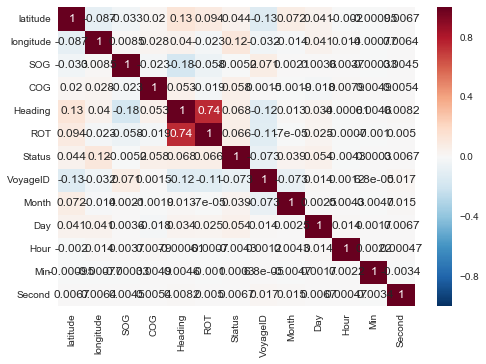

In [12]:
sns.set()
# Performing pair wise correlation on the selected list of attributes
df_cor = df.corr()
sns.heatmap(df_cor, annot=True)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [14]:
df.columns

Index(['latitude', 'longitude', 'SOG', 'COG', 'Heading', 'ROT', 'Status',
       'VoyageID', 'Month', 'Day', 'Hour', 'Min', 'Second'],
      dtype='object')

In [15]:
latitude_train_X = df[['SOG', 'COG', 'Heading', 'ROT', 'Status',
       'VoyageID', 'Month', 'Day', 'Hour', 'Min', 'Second']]
latitude_train_Y = df[['latitude']]

In [16]:
latitude_train_X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SOG,4028095.0,1.449675,4.410555,0.0,0.0,0.000000,0.1,102.300003
COG,4028095.0,197.874855,119.099703,0.0,87.0,229.199997,303.0,388.700012
Heading,4028095.0,383.380398,174.293921,0.0,234.0,511.000000,511.0,511.000000
ROT,4028095.0,84.917120,61.115905,0.0,0.0,128.000000,128.0,255.000000
Status,4028095.0,4.870283,6.447782,0.0,0.0,0.000000,15.0,15.000000
VoyageID,4028095.0,13.505811,9.778595,3.0,5.0,11.000000,21.0,35.000000
Month,4028095.0,2.011853,0.838665,1.0,1.0,2.000000,3.0,12.000000
Day,4028095.0,14.210962,8.796579,1.0,6.0,14.000000,21.0,31.000000
Hour,4028095.0,11.545405,7.008041,0.0,5.0,12.000000,18.0,23.000000
Min,4028095.0,29.475288,17.366794,0.0,14.0,29.000000,45.0,59.000000


In [17]:
latitude_train_Y.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,4028095.0,53.324851,8.946464,-83.96705,51.825041,55.354352,57.784813,83.039922


In [20]:
latitude_final_columns = list(latitude_train_X.columns)

In [21]:
latitude_final_columns

['SOG',
 'COG',
 'Heading',
 'ROT',
 'Status',
 'VoyageID',
 'Month',
 'Day',
 'Hour',
 'Min',
 'Second']

In [22]:
latitude_linear_reg_train_X, latitude_linear_reg_test_X , latitude_linear_reg_train_Y, latitude_linear_reg_test_Y = train_test_split(latitude_train_X, latitude_train_Y, test_size=0.2, random_state=23)

# Linear Regression model initialization (basic)
latitude_linear_regression = LinearRegression()

# Training the Linear Regression Model
latitude_linear_regression.fit(latitude_linear_reg_train_X, latitude_linear_reg_train_Y)

# Using the model to predict the test dataset
latitude_linear_reg_predicted_Y = latitude_linear_regression.predict(latitude_linear_reg_test_X)

# The coefficients of the linear equation aX1 + bX2 + cX3 + ... = Y
print('Coefficients (a,b,c,..) : ', [(x,y) for x,y in zip(latitude_final_columns, latitude_linear_regression.coef_)])

# The mean squared error of the linear regression model's predictions
print("Mean squared error: %.5f" % mean_squared_error(latitude_linear_reg_test_Y, latitude_linear_reg_predicted_Y))

# Variance of the prediction
print('Variance : %.5f' % r2_score(latitude_linear_reg_test_Y, latitude_linear_reg_predicted_Y))

Coefficients (a,b,c,..) :  [('SOG', array([ -1.16137435e-02,   9.71316067e-04,   5.56187830e-03,
        -2.29197801e-04,   3.31641198e-02,  -9.93790226e-02,
         6.57885235e-01,   3.83313334e-02,  -3.75776081e-03,
        -5.30962606e-04,   3.33382399e-03]))]
Mean squared error: 77.29097
Variance : 0.03463


In [23]:
longitude_train_X = df[['SOG', 'COG', 'Heading', 'ROT', 'Status',
       'VoyageID', 'Month', 'Day', 'Hour', 'Min', 'Second']]
longitude_train_Y = df[['longitude']]

In [24]:
longitude_train_X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SOG,4028095.0,1.449675,4.410555,0.0,0.0,0.000000,0.1,102.300003
COG,4028095.0,197.874855,119.099703,0.0,87.0,229.199997,303.0,388.700012
Heading,4028095.0,383.380398,174.293921,0.0,234.0,511.000000,511.0,511.000000
ROT,4028095.0,84.917120,61.115905,0.0,0.0,128.000000,128.0,255.000000
Status,4028095.0,4.870283,6.447782,0.0,0.0,0.000000,15.0,15.000000
VoyageID,4028095.0,13.505811,9.778595,3.0,5.0,11.000000,21.0,35.000000
Month,4028095.0,2.011853,0.838665,1.0,1.0,2.000000,3.0,12.000000
Day,4028095.0,14.210962,8.796579,1.0,6.0,14.000000,21.0,31.000000
Hour,4028095.0,11.545405,7.008041,0.0,5.0,12.000000,18.0,23.000000
Min,4028095.0,29.475288,17.366794,0.0,14.0,29.000000,45.0,59.000000


In [25]:
longitude_train_Y.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,4028095.0,-143.572841,15.218203,-179.99845,-152.41631,-146.747445,-131.661445,-120.002302


In [26]:
longitude_final_columns = list(longitude_train_X.columns)

In [27]:
longitude_linear_reg_train_X, longitude_linear_reg_test_X , longitude_linear_reg_train_Y, longitude_linear_reg_test_Y = train_test_split(longitude_train_X, longitude_train_Y, test_size=0.2, random_state=23)

# Linear Regression model initialization (basic)
longitude_linear_regression = LinearRegression()

# Training the Linear Regression Model
longitude_linear_regression.fit(longitude_linear_reg_train_X, longitude_linear_reg_train_Y)

# Using the model to predict the test dataset
longitude_linear_reg_predicted_Y = longitude_linear_regression.predict(longitude_linear_reg_test_X)

# The coefficients of the linear equation aX1 + bX2 + cX3 + ... = Y
print('Coefficients (a,b,c,..) : ', [(x,y) for x,y in zip(longitude_final_columns, longitude_linear_regression.coef_)])

# The mean squared error of the linear regression model's predictions
print("Mean squared error: %.5f" % mean_squared_error(longitude_linear_reg_test_Y, longitude_linear_reg_predicted_Y))

# Variance of the prediction
print('Variance : %.5f' % r2_score(longitude_linear_reg_test_Y, longitude_linear_reg_predicted_Y))

Coefficients (a,b,c,..) :  [('SOG', array([ 0.09244187,  0.00173652,  0.01090103, -0.03108759,  0.2658263 ,
       -0.04203687, -0.40769113,  0.0594978 ,  0.03017794, -0.00157476,
        0.00505283]))]
Mean squared error: 225.98367
Variance : 0.02434
